In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib as mpl
import seaborn as sns 
import json
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
from shapely.geometry import Polygon
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statistics 

/Users/liqingchun/opt/anaconda3/envs/Ida/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
data = pd.read_csv("./August 2021-September 2021 NY/NY-PATTERNS-2021_08-2021-09-08/patterns.csv.gz")

/var/folders/p8/bvspn6b17fq6qdlms6828h_80000gn/T/ipykernel_76256/1008556.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./August 2021-September 2021 NY/NY-PATTERNS-2021_08-2021-09-08/patterns.csv.gz")


In [3]:
core = pd.read_csv("./New York State core/NY.csv.gz")

In [4]:
df = data.merge(core, how='left', on='placekey')

In [5]:
len(df)

244369

In [6]:
df.loc[0]

placekey                                                     22s-223@627-s92-rx5
parent_placekey                                                              NaN
location_name                                                    Sushi & Noodles
street_address                                                   274 Troutman St
city                                                                    Brooklyn
region                                                                        NY
postal_code                                                                11237
safegraph_brand_ids                                                          NaN
brands                                                                       NaN
date_range_start                                       2021-08-01T00:00:00-04:00
date_range_end                                         2021-09-01T00:00:00-04:00
raw_visit_counts                                                              47
raw_visitor_counts          

In [7]:
visit_list_temp = list(df.visits_by_day)

#len(visit_list_temp)

visit_list = []
sum_list = []

for each in visit_list_temp:
    if (each is np.nan) != True:
        temp = json.loads(each)
        visit_list.append(temp)
        sum_list.append(sum(temp))
    elif (each is np.nan) == True:
        temp = [0]*31
        visit_list.append(temp)
        sum_list.append(0)

date = pd.date_range('8/1/2021', periods=31)

visit_dataframe = pd.DataFrame(np.array(visit_list), columns=date)
visit_dataframe['top_category'] = list(df.sg_c__top_category)
visit_dataframe['raw_visit_counts'] = list(df.raw_visit_counts)
visit_dataframe['Sum_visits'] = np.array(sum_list)

visit_by_day = visit_dataframe.groupby(['top_category']).sum()

In [8]:
visit_by_day

,2021-08-01 00:00:00,2021-08-02 00:00:00,2021-08-03 00:00:00,2021-08-04 00:00:00,2021-08-05 00:00:00,2021-08-06 00:00:00,2021-08-07 00:00:00,2021-08-08 00:00:00,2021-08-09 00:00:00,2021-08-10 00:00:00,...,2021-08-24 00:00:00,2021-08-25 00:00:00,2021-08-26 00:00:00,2021-08-27 00:00:00,2021-08-28 00:00:00,2021-08-29 00:00:00,2021-08-30 00:00:00,2021-08-31 00:00:00,raw_visit_counts,Sum_visits
top_category,,,,,,,,,,,,,,,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",839,979,942,990,1033,970,919,817,1071,915,...,1034,943,961,941,873,860,941,1065,28970,28970
Activities Related to Credit Intermediation,70,156,165,170,143,151,95,65,174,157,...,152,161,137,148,91,89,181,181,4315,4315
Activities Related to Real Estate,105,134,132,140,135,137,110,117,123,122,...,178,153,170,194,165,140,181,166,4402,4402
Administration of Economic Programs,444,777,681,711,644,580,271,221,664,622,...,965,964,987,770,320,263,646,639,18349,18349
Administration of Human Resource Programs,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utility System Construction,50,65,69,59,77,70,71,61,85,71,...,66,68,59,59,47,77,79,82,2050,2050
Warehousing and Storage,775,1111,1146,1152,1089,1012,753,741,1052,1212,...,1183,1186,1105,1091,790,795,1176,1160,31404,31404
Waste Collection,61,88,66,95,82,72,50,57,81,62,...,78,70,65,88,51,54,62,57,2160,2160


In [9]:
visit = visit_by_day.drop(columns=['raw_visit_counts', 'Sum_visits'])

In [10]:
visit_norm = visit_by_day.divide(list(visit_by_day.Sum_visits), axis='index').drop(columns=['raw_visit_counts', 'Sum_visits'])

In [11]:
temp = visit.T.rolling(window=7).mean().dropna()

In [12]:
len(temp.mean(axis=0)[temp.mean(axis=0) > 1200])

68

In [13]:
visit.sum(axis=1).sort_values(ascending=False)[0:10]

top_category
Restaurants and Other Eating Places                                       9201463
Museums, Historical Sites, and Similar Institutions                       3823375
Lessors of Real Estate                                                    3428929
Other Amusement and Recreation Industries                                 2801717
Grocery Stores                                                            1953298
Gasoline Stations                                                         1669927
General Merchandise Stores, including Warehouse Clubs and Supercenters    1227636
Health and Personal Care Stores                                           1184364
Elementary and Secondary Schools                                          1170019
Sporting Goods, Hobby, and Musical Instrument Stores                       793110
dtype: int64

In [14]:
visit.sum(axis=1).sort_values(ascending=False)[10:20]

top_category
Religious Organizations                   790173
Drinking Places (Alcoholic Beverages)     775495
Other Miscellaneous Store Retailers       758971
Traveler Accommodation                    732195
General Medical and Surgical Hospitals    662032
Department Stores                         516434
Child Day Care Services                   504591
Building Material and Supplies Dealers    439883
Clothing Stores                           434317
Offices of Physicians                     424938
dtype: int64

In [25]:
visit.T['Grocery Stores'].rolling(window=7).mean().loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')].mean()

63318.01785714286

In [24]:
visit.T['Grocery Stores'].rolling(window=7).mean().max()

64091.0

In [26]:
64091.0/63318.01785714286

1.0122079333658411

In [17]:
a = visit.T['Grocery Stores'].rolling(window=7).mean().loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')].mean()

b = visit.T['Grocery Stores'].rolling(window=7).mean().max()

b/a

1.0122079333658411

In [18]:
a = visit.T['Gasoline Stations'].rolling(window=7).mean().loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')].mean()

b = visit.T['Gasoline Stations'].rolling(window=7).mean().max()

b/a

1.029420593827071

In [19]:
a = visit.T['Building Material and Supplies Dealers'].rolling(window=7).mean().loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')].mean()

b = visit.T['Building Material and Supplies Dealers'].rolling(window=7).mean().max()

b/a

1.023463743337021

In [15]:
def Cat(cat):
    plt.style.use('default') 
    plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':300})
    import matplotlib_inline.backend_inline
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina', quality=100)
    #fig, ax = plt.subplots(2, 1, sharex=True) original style
    fig, ax1 = plt.subplots()
    
    #origin
    temp = visit.T[cat]
    mean_roll = temp.rolling(window=7).mean()
    base_roll = mean_roll.loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')]
    
    #mean_roll.plot(color="black",label="rolling mean", linestyle='--' ,ax = ax1, marker='o',markersize=3.5,
                                                     #markerfacecolor='none',dashes=(5, 1), linewidth=1)

    temp.plot(kind="line", label='raw data', linestyle='-', color="black", ax = ax1, marker='o',markersize=3.5,
              linewidth=1)
    
    upper = base_roll.mean() + 3*base_roll.std()
    lower = base_roll.mean() - 3*base_roll.std()
    
    #ax1.set_xticks(np.arange('2021-08', '2021-09', dtype='datetime64[D]'))
    #x_tick = ['']+['2021-08-02']+6*['']+['2021-08-09']+6*['']+['2021-08-16']+6*['']+['2021-08-23']+6*['']+['2021-08-30']+['']
    #ax1.set_xticklabels(x_tick)
    
    #ax1.legend(loc=0, fontsize=12)
    #ax1.axhspan(lower, upper, alpha=0.5, color='gray')
    #ax1.axvspan('2021-08-28', '2021-08-30', alpha=0.5, color='gray')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    
    #normalize
    
    ax2 = ax1.twinx()
    temp1 = visit_norm.T[cat]
    
    mean_roll = temp1.rolling(window=7).mean()
    base_roll = mean_roll.loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')]
    
    upper = base_roll.mean() + 3*base_roll.std()
    lower = base_roll.mean() - 3*base_roll.std()
    
    mean_roll.plot(color="black",label="rolling mean", linestyle='--', ax=ax2, marker='o',markersize=3.5,
                                                     dashes=(3, 1), markerfacecolor='none', linewidth=1)
    
    temp1.plot(kind="line", label='raw data', color="black", linestyle='-', ax=ax2, marker='o',markersize=3.5,
                     linewidth=1)
    

    ax2.set_xticks(np.arange('2021-08', '2021-09', dtype='datetime64[D]'))
    x_tick = ['']+['08-02']+6*['']+['08-09']+6*['']+['08-16']+6*['']+['08-23']+6*['']+['08-30']+['']
    ax2.set_xticklabels(x_tick)
    
    ax2.legend(loc=0, fontsize=12)
    ax2.axhspan(lower, upper, alpha=0.5, color='gray')
    ax2.axvspan('2021-08-29', '2021-08-30', alpha=0.5, color='gray')
    ax2.axvspan('2021-08-22', '2021-08-23', alpha=1, color='gray')
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    fig.tight_layout() 
    foo_fig = plt.gcf()  # 'get current figure'
    foo_fig.savefig(cat + '_NY.png')
    plt.show()
    return None
    

TypeError: index type not supported

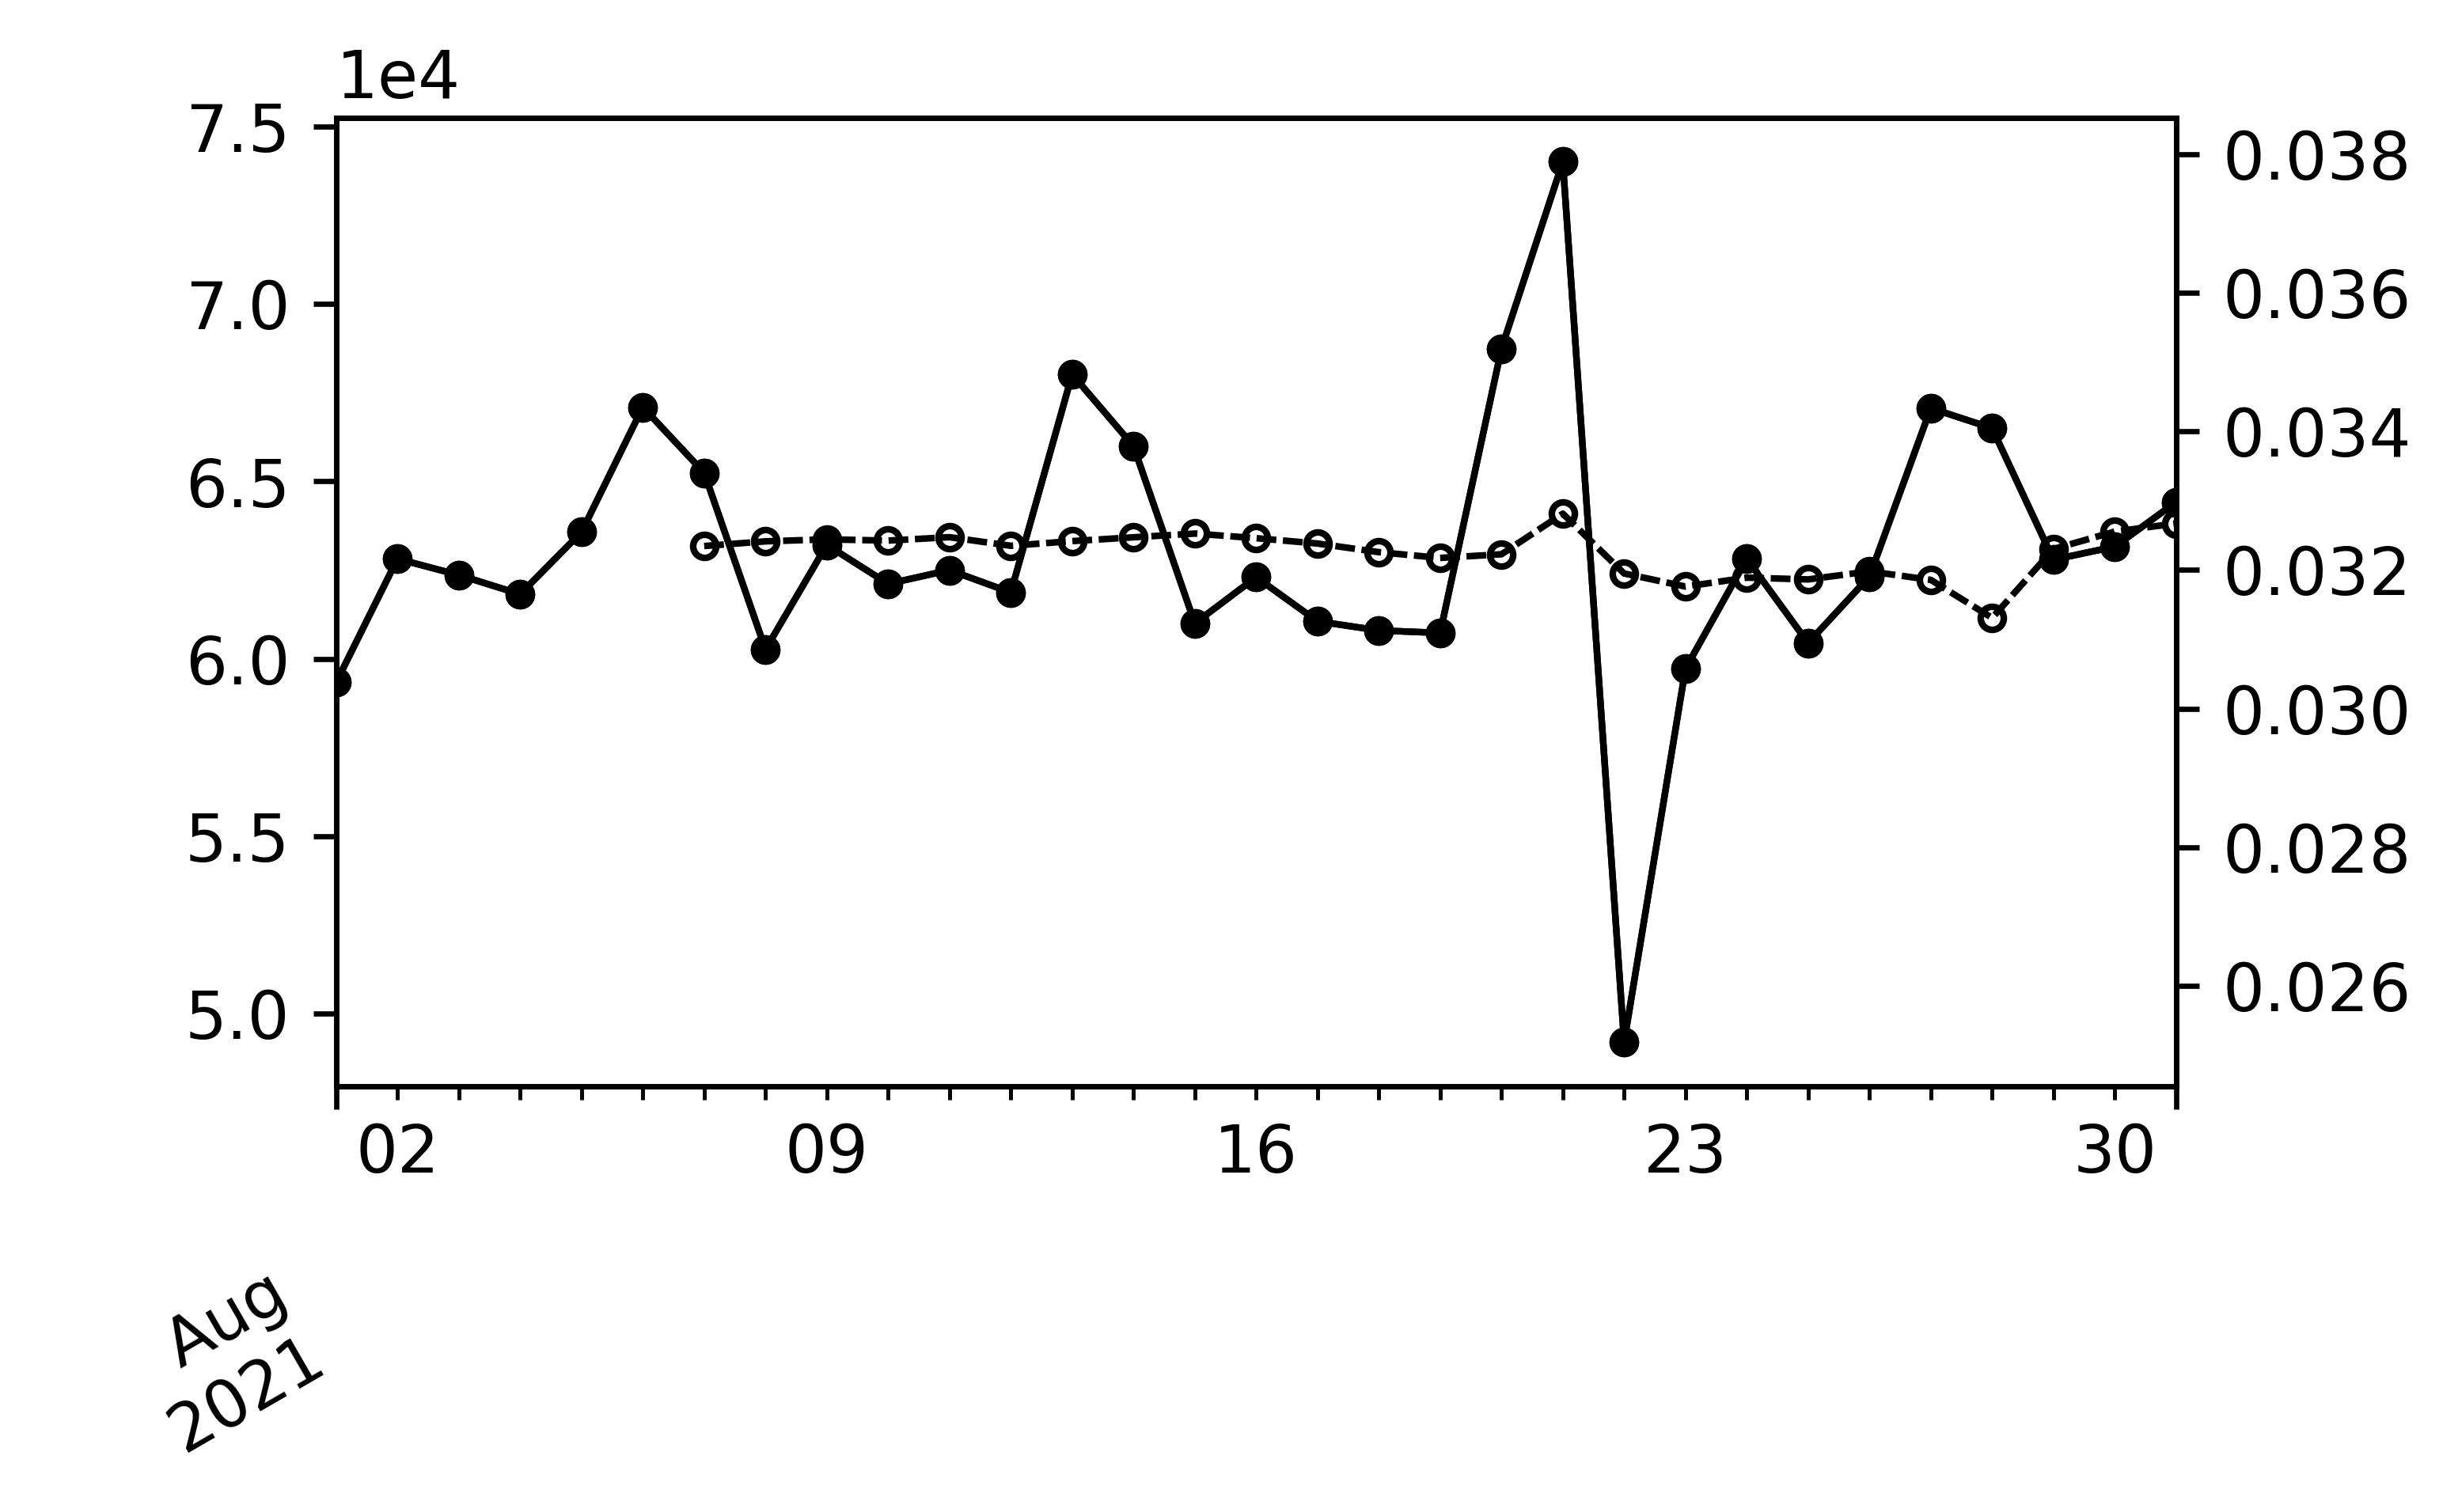

In [16]:
Cat('Grocery Stores')

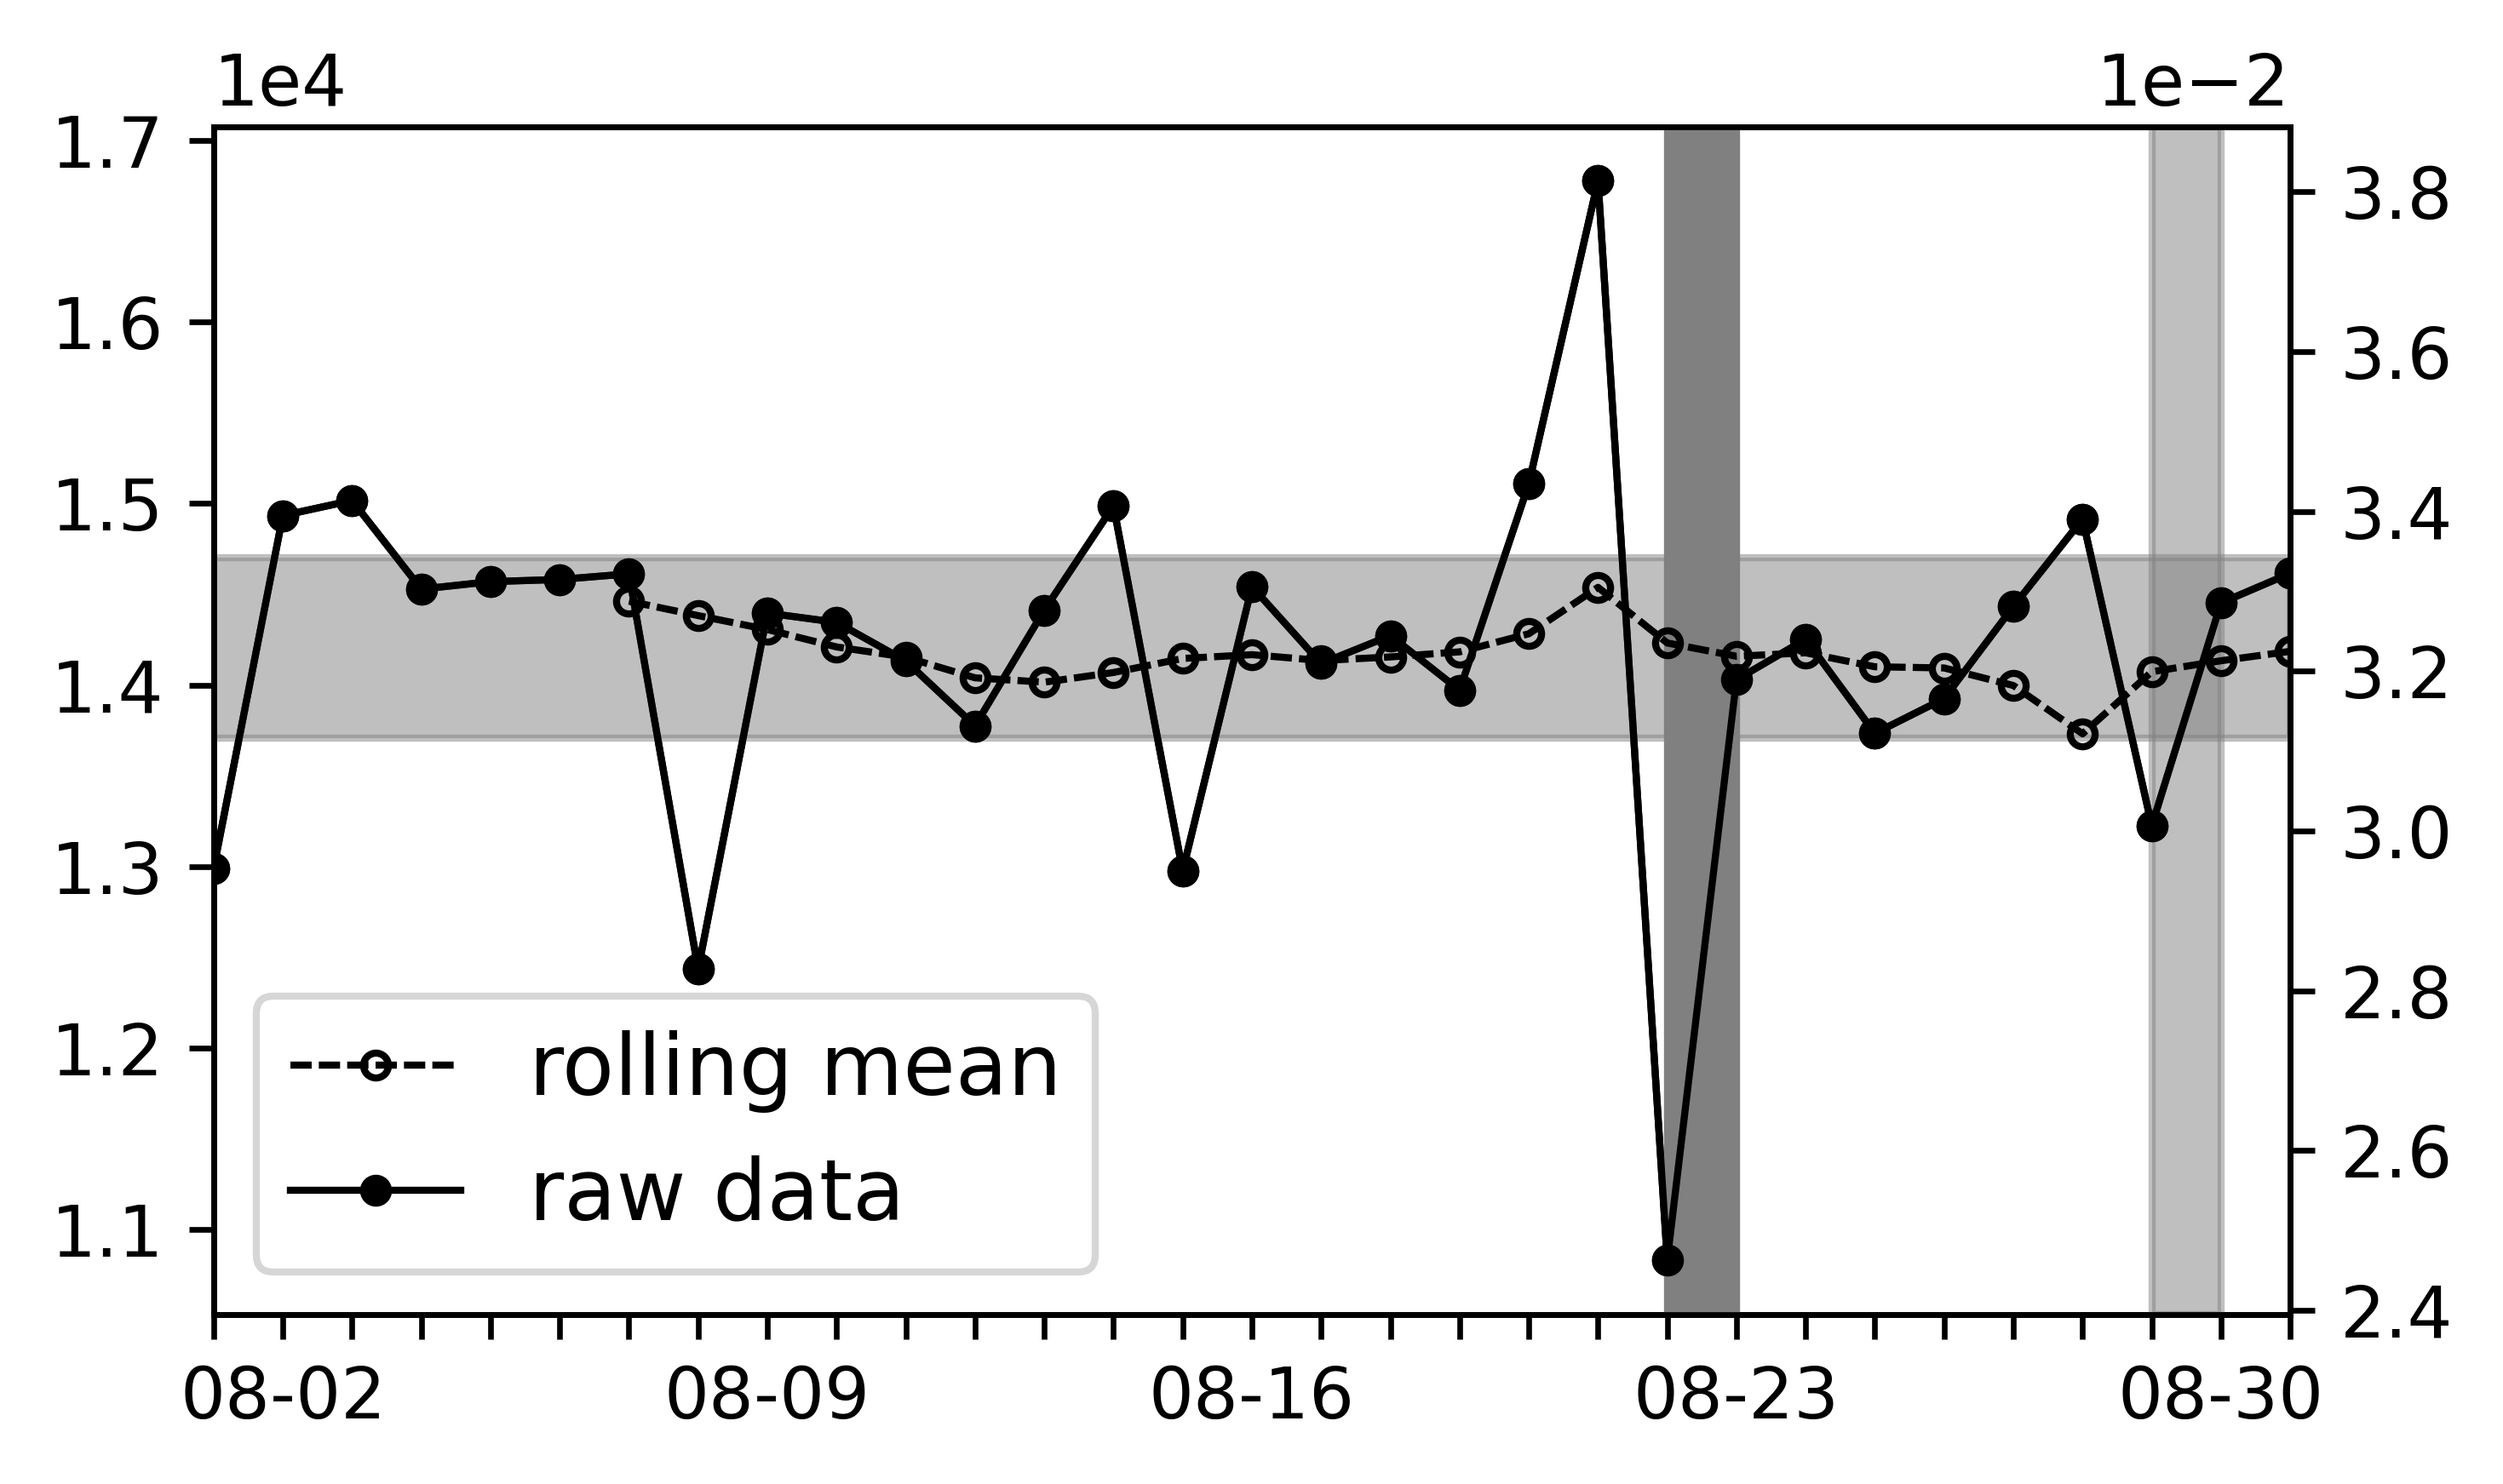

In [89]:
Cat('Building Material and Supplies Dealers')

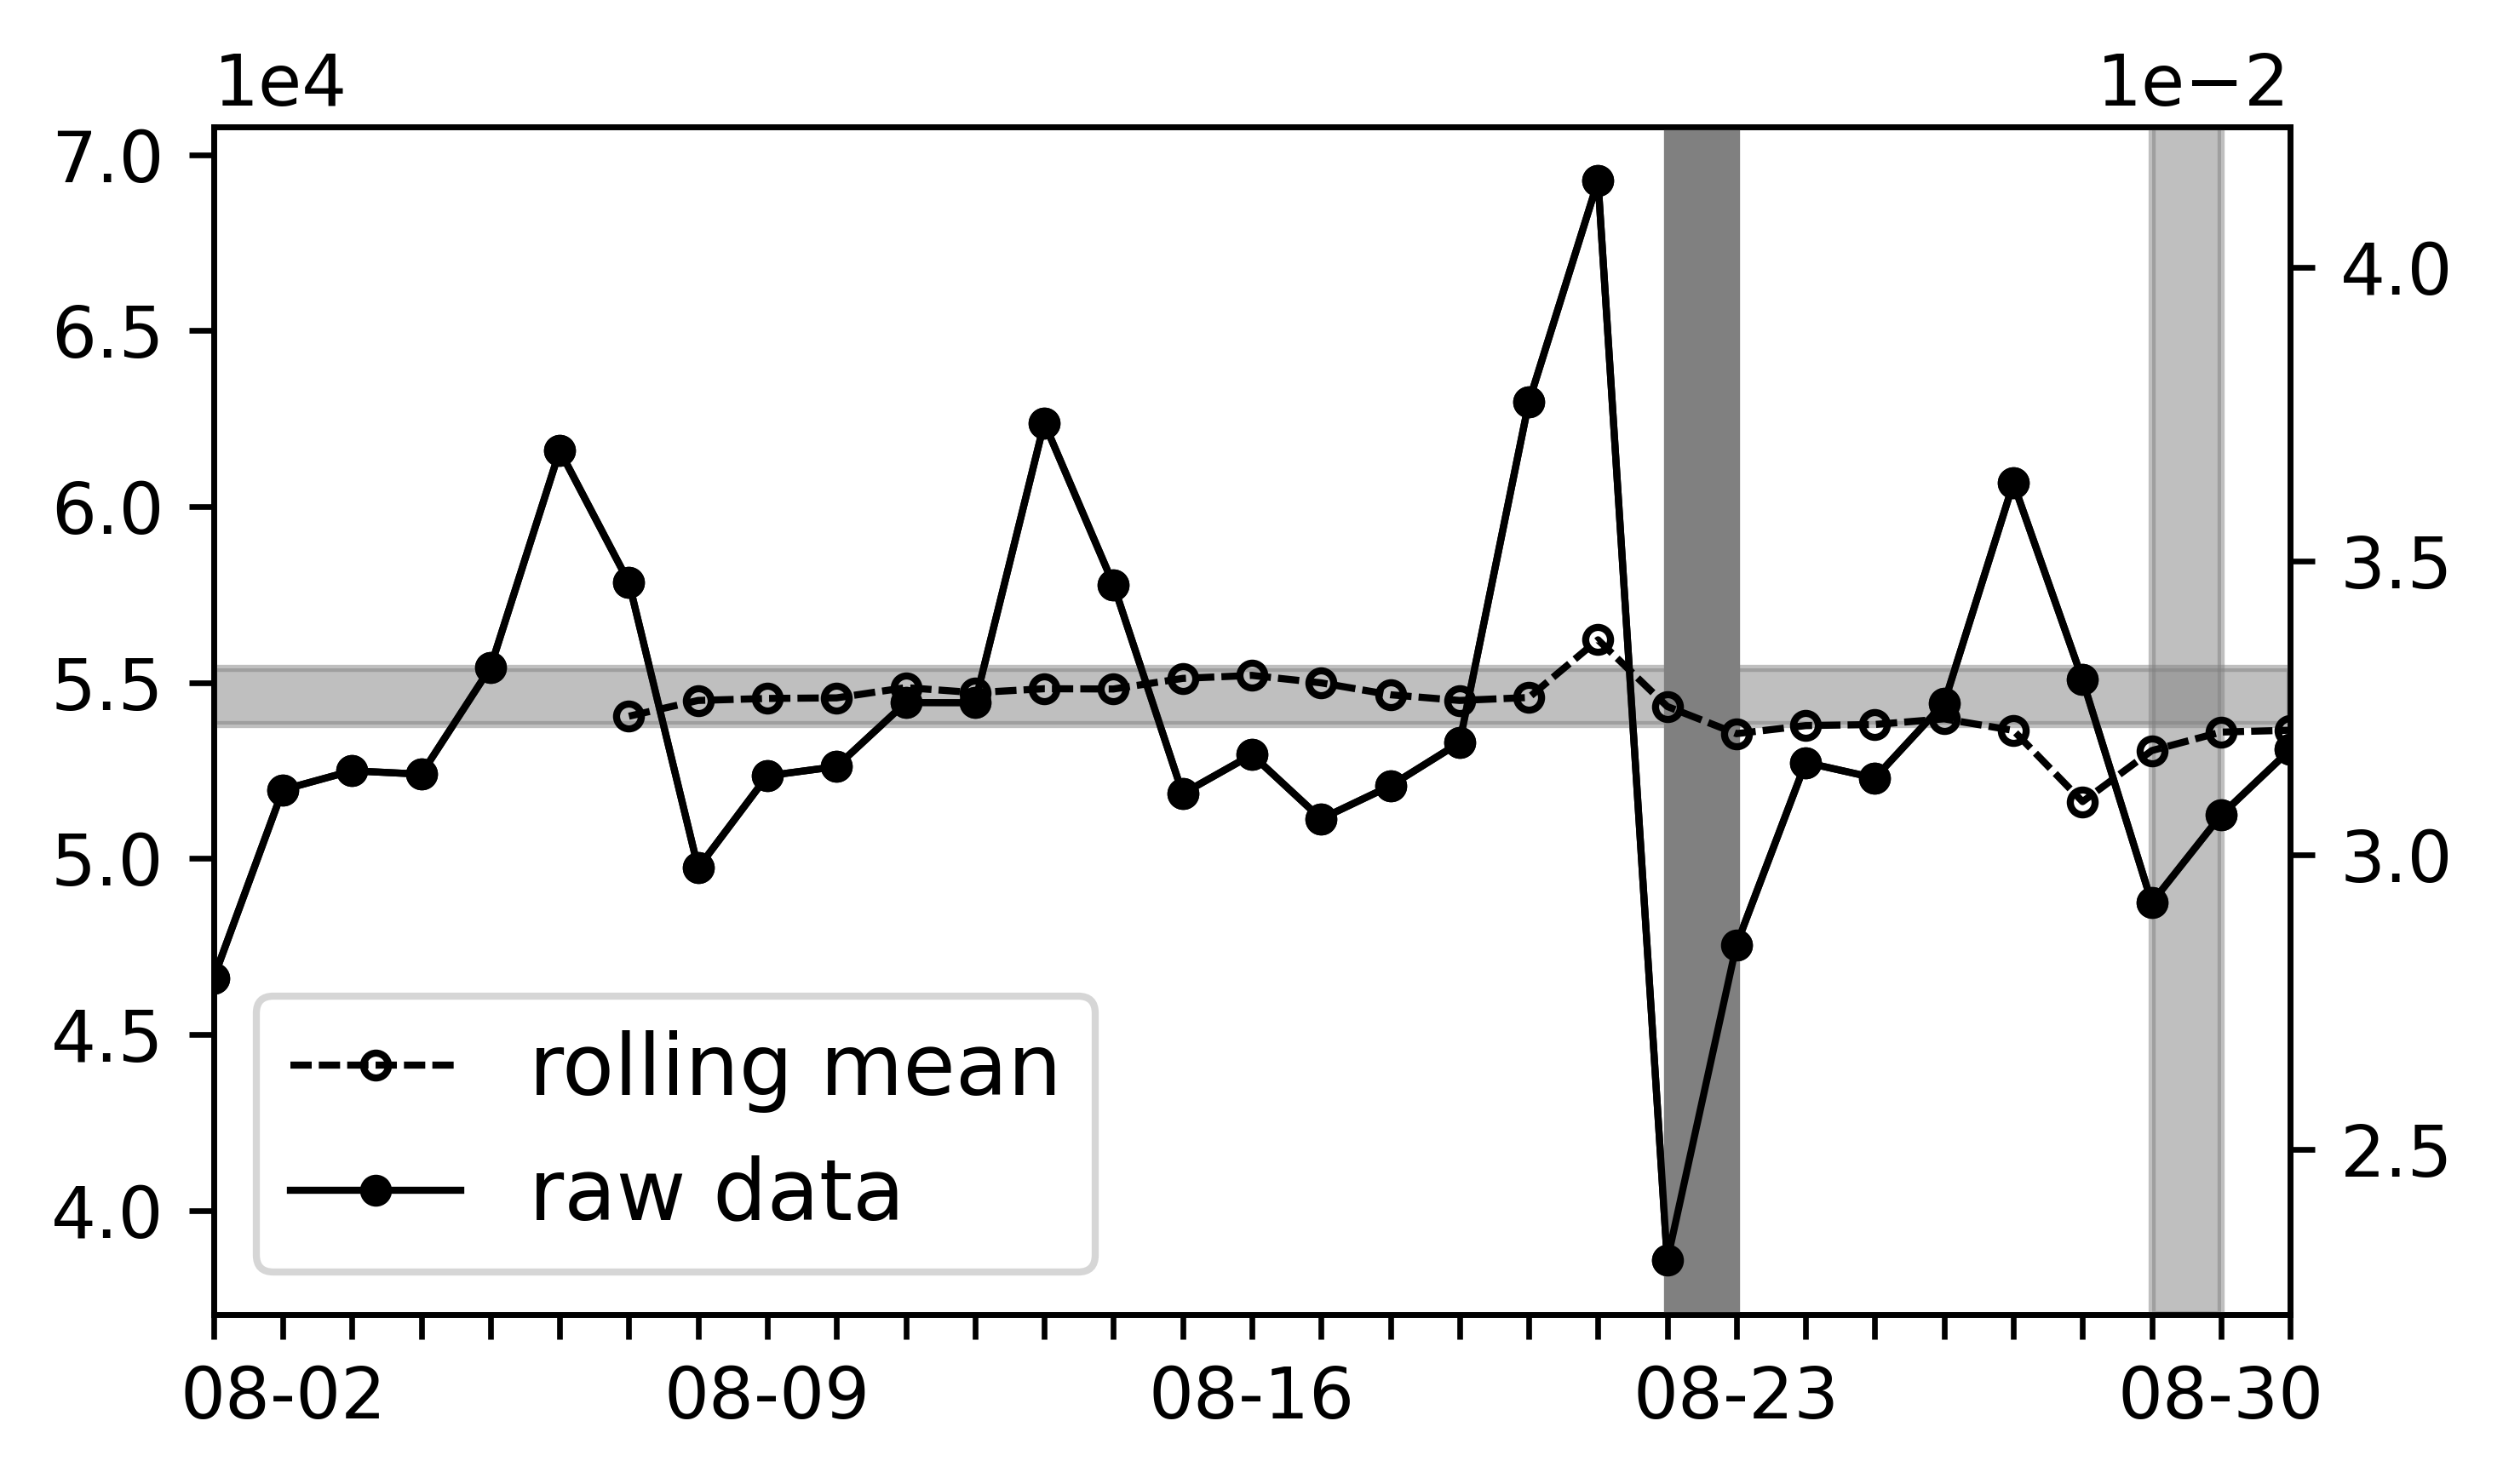

In [90]:
Cat('Gasoline Stations')

In [54]:
def Find_increase(cat):
    
    
    raw_diff = visit_norm.T.diff().rolling(window=7).mean()
    raw = visit_norm.T.rolling(window=7).mean()
    
    no_norm = visit.T.rolling(window=7).mean()
    
    base_diff = raw_diff.loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')][cat]
    base1 = raw.loc[np.arange('2021-08-01', '2021-08-15', dtype='datetime64[D]')][cat]
    
    upper_diff = base_diff.mean() + 3*base_diff.std()
    upper = base1.mean() + 3*base1.std()
    
    check_list = raw.loc[np.arange('2021-08-21', '2021-08-29', dtype='datetime64[D]')][cat]
    check_list_diff = raw_diff.loc[np.arange('2021-08-21', '2021-08-29', dtype='datetime64[D]')][cat]
    check_list_no_norm = no_norm.loc[np.arange('2021-08-21', '2021-08-29', dtype='datetime64[D]')][cat]
    
    result_list = []
    for i in range(len(check_list)):
        if check_list[i] >= upper and check_list_diff[i] >= upper_diff and check_list_no_norm[i] >= 1200: 
            result_list.append((check_list[i]-base1.mean())/base1.std())
    if len(result_list) > 0:
        result = (cat, max(result_list))
    else:
        result = None
    return result

In [55]:
category = list(visit.index)
jump_dict = {}
for cat in category:
    res_temp = Find_increase(cat)
    if (res_temp):
        jump_dict[res_temp[0]] = res_temp[1]

In [56]:
jump_dict

{'Book Stores and News Dealers': 66.00148426175251,
 'Colleges, Universities, and Professional Schools': 62.73027801169087,
 'Elementary and Secondary Schools': 11.758711624454028,
 'Gasoline Stations': 6.009748434415971,
 'Grocery Stores': 8.126019331731037,
 'Junior Colleges': 21.475149180244628,
 'Nursing Care Facilities (Skilled Nursing Facilities)': 5.778986272522634,
 'Other Information Services': 30.978302484477076,
 'Other Schools and Instruction': 55.25713569249842}

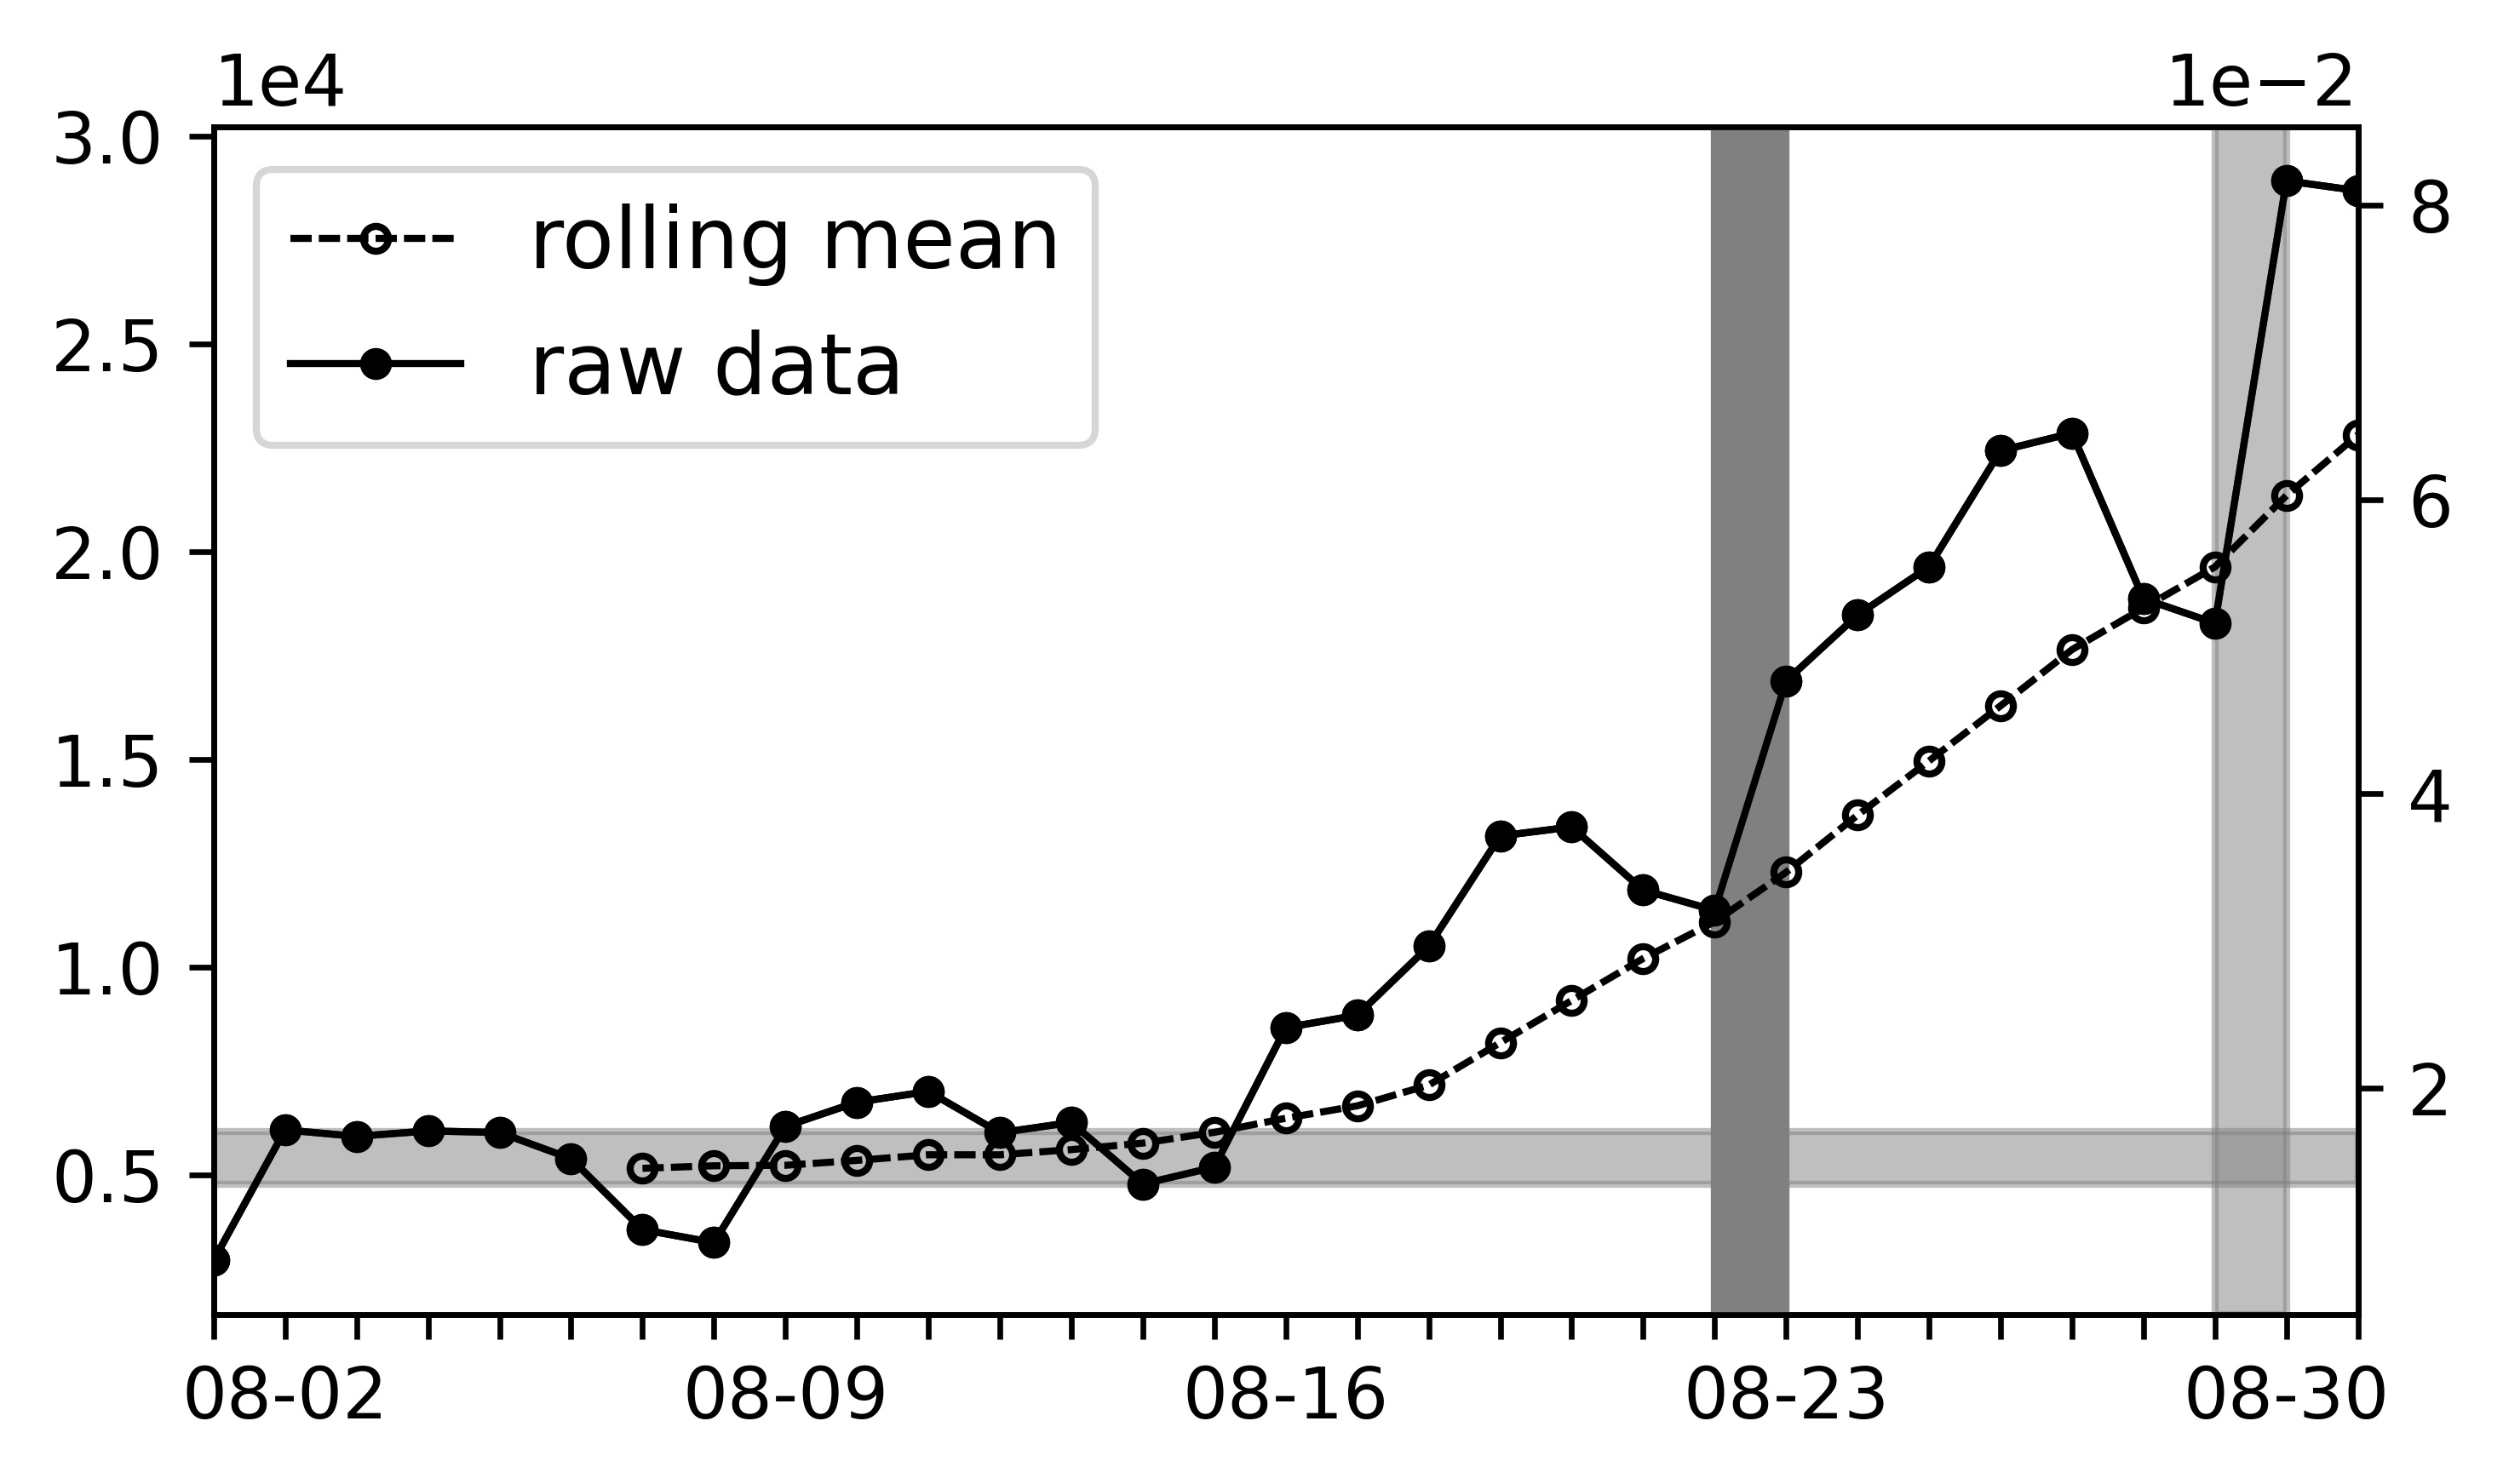

In [105]:
Cat('Colleges, Universities, and Professional Schools')

In [38]:
a = base_norm.T['Building Material and Supplies Dealers'].rolling(window=7).mean()

In [39]:
(build-a.mean())/a.std()

2021-08-21    2.013546
2021-08-22    0.163121
2021-08-23   -0.279635
2021-08-24   -0.163984
2021-08-25   -0.628316
2021-08-26   -0.668017
2021-08-27   -1.251454
Name: Building Material and Supplies Dealers, dtype: float64